# “Churn” de clientes em uma empresa de telecomunicações

Nome: Fabio Gustavo Gomes Vaz<br/>
RA: 00282997<p>

Nome: Felipe Fernandes Rojas<br/>
RA: 00282999<p>

**Projeto 1 da disciplina Consultoria Especializada de Apoio ao Projeto Integrado: Mineração de Dados, do curso de Ciência de Dados e Inteligência Artificial da PUC-SP**

## Projeto
Treinar e validar uma árvore de decisão e avaliar a precisão do modelo.

##Dataset


* Clientes que saíram no último mês - a coluna é chamada Churn, esse é o valor a ser previsto no modelo

* Serviços para os quais cada cliente se inscreveu: telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico, streaming de TV e filmes.

* Informações da conta do cliente: Informações da conta do cliente: há quanto tempo eles são clientes (tenure), contrato, forma de pagamento, faturamento sem papel, cobranças mensais e cobranças totais.

* Informações demográficas sobre clientes: sexo, faixa etária e se têm parceiros e dependentes.



In [ ]:
# Dependências
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree  
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np


## Tratamento dos dados

Tratar os dados, com a intenção de aproveitar todos os dados e preparar para o modelo.

In [ ]:
# Criação do DataFrame
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Investigação inicial para saber se há dados nulos ou vazios.

In [ ]:
#Informação sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Não há nenhum dado nulo no dataset.

Após ver que não há nenhum dado nulo, irei fazer a invetigação de dado indevidos

In [ ]:
#Imprimir os unique de todas as colunas do dataset
for i in df:
  uniq = df[i].unique()
  print(f'{i}: {uniq}\n')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank tra

A princípio não há ruído nos dados. 

### Preparar dados

Transformação dos atributos em dados numéricos, para viabilizar a modelagem dos dados.

In [ ]:
# Fatorização dos dados categóricos
df['gender'], gender = df['gender'].factorize()
df['Partner'], Partner = df['Partner'].factorize()
df['Dependents'], Dependents = df['Dependents'].factorize()
df['PhoneService'], PhoneService = df['PhoneService'].factorize()
df['MultipleLines'], MultipleLines = df['MultipleLines'].factorize()
df['InternetService'], InternetService = df['InternetService'].factorize()
df['OnlineSecurity'], OnlineSecurity = df['OnlineSecurity'].factorize()
df['OnlineBackup'], OnlineBackup = df['OnlineBackup'].factorize()
df['DeviceProtection'], DeviceProtection = df['DeviceProtection'].factorize()
df['TechSupport'], TechSupport = df['TechSupport'].factorize()
df['StreamingTV'], StreamingTV = df['StreamingTV'].factorize()
df['StreamingMovies'], StreamingMovies = df['StreamingMovies'].factorize()
df['Contract'], Contract = df['Contract'].factorize()
df['PaperlessBilling'], PaperlessBilling = df['PaperlessBilling'].factorize()
df['PaymentMethod'], PaymentMethod = df['PaymentMethod'].factorize()
df['Churn'], Churn = df['Churn'].factorize()

In [ ]:
# Tipos dos dados 
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

A coluna TotalCharges é quantitativa, mas sua natureza no conjunto de dados, por alguma razão, foi dada como objeto (não numérico). Ao tentar transformá-la, ocorreu o erro de linha com o seguinte caractere ' ', portanto serão transformados todos os dados com esse caractere para nulo e em seguida substituídos pela média da coluna. 

In [ ]:
# Substituição dos dados desconhecidos por nulos
df.replace(' ', np.nan, inplace=True)

# Transformação em dados numéircos
df['TotalCharges'] = df['TotalCharges'].astype('float')
avg = df['TotalCharges'].mean()

# Substituição dos dados nulos pela média do atributo
df['TotalCharges'].replace(np.nan, avg, inplace=True)

In [ ]:
# DataFrame fatorizado, preparado para o processo de modelagem
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,5575-GNVDE,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,3668-QPYBK,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,7795-CFOCW,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,9237-HQITU,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1


## Modelo

Nesta seção, utilizaremos a biblioteca *scikit-learn* para identificar padrões através da coletânea de dados deste projeto e prever classificações de instâncias aleatórias. O modelo utilizado será Arvore de Decisão 

A seção ccp padrão, será feita com o ccp_alpha padrão, 0,01.

A seção ccp ótimo, será feita com ccp_alpha ótimo do dataset.

**MODELOS DE ÁRVORE:** é um conjunto de regras _if-then-else_ que são fáceis de entender e implementar. Diferente de regressão, as árvores têm a habilidade de descobrir padrões escondidos correspondentes a iterações complexas nos dados. 

**cp (parâmetro de complexidade):** É uma medida de quão complexa é uma árvore. Na prática, o cp é usado para limitar o crescimento da árvore anexando uma penalidade para complexidade (divisões) adicionais em uma árvore.

_`conceitos tirados do livro Estatística Prática para Cientistas de Dados: 50 conceitos básicos, de Peter Bruce & Andrew Bruce`_

**ccp_alpha:** É basicamente o custo atribuido para controlar o crescimento da árvore. Valores maiores de ccp_alpha aumentam o número de nós podados.

In [ ]:
# Definição das classes X e y
X = df.drop(['customerID','Churn'], axis = 1)
y = df['Churn']

In [ ]:
# Divisão em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [ ]:
print(f'Proporção dos dados\nTreino: {round(len(X_train)/len(X),2)} \nTeste {round(len(X_test)/len(X),2)}')

Proporção dos dados
Treino: 0.8 
Teste 0.2


### ccp_alpha padrão

Segundo Peter Bruce e Andrew Bruce, a predefinição de cp é 0,01.

In [ ]:
# Árvore de decisão
desiciontree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)

In [ ]:
# Modelo com os dados de treino
modelo_padrao = desiciontree.fit(X_train,y_train)

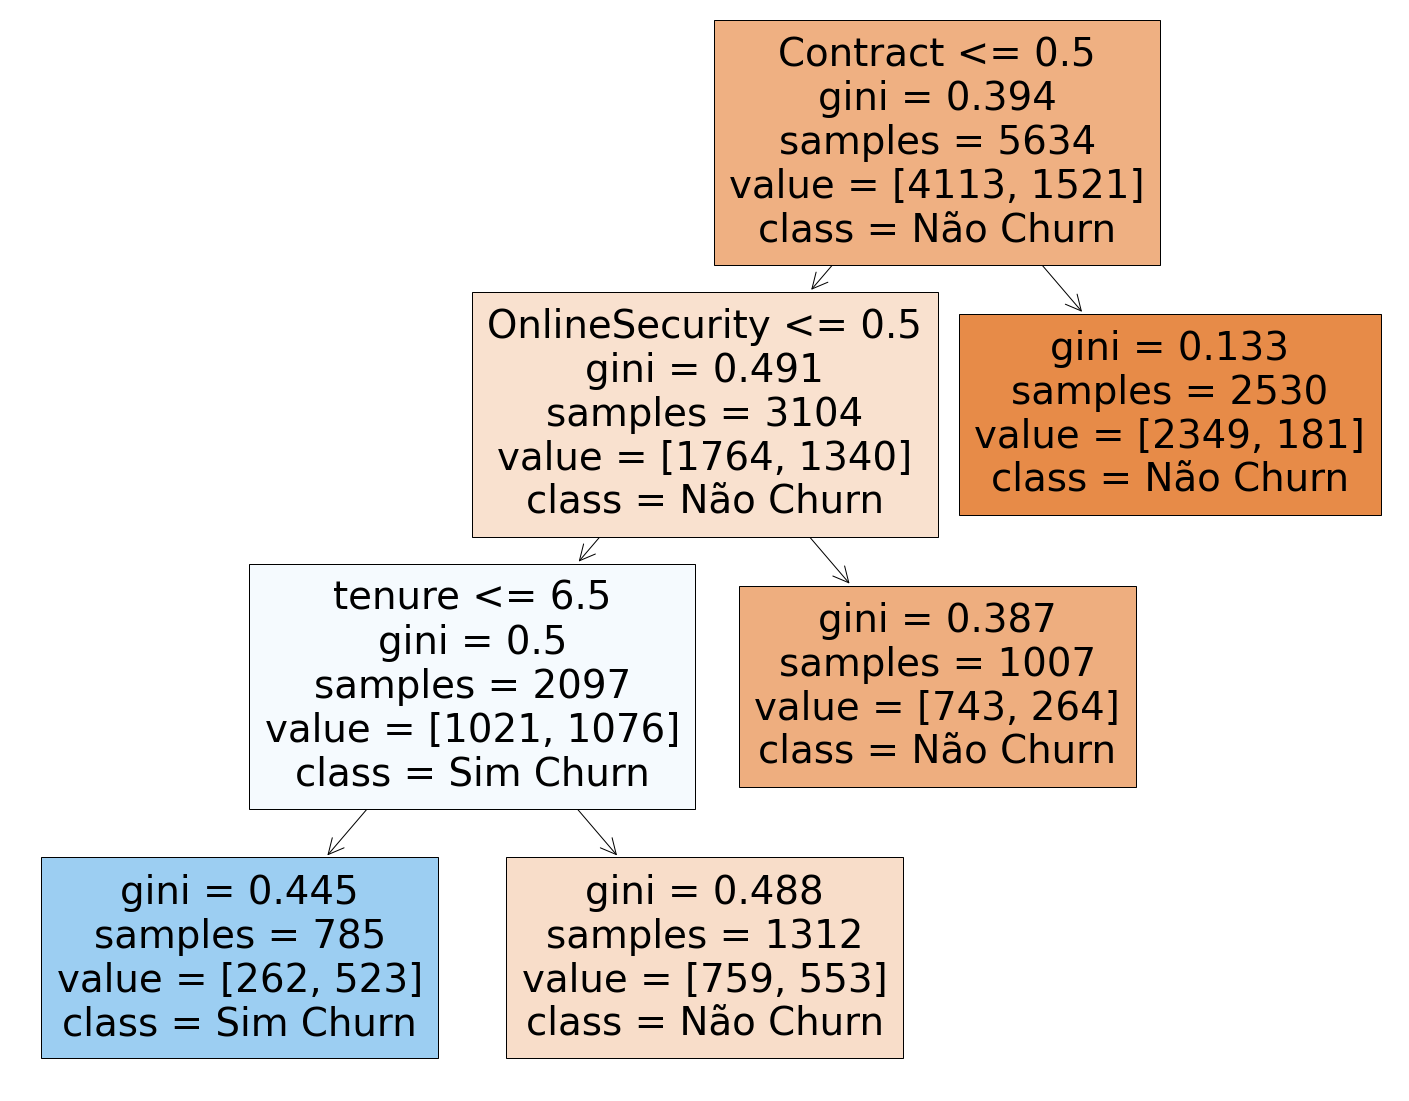

In [ ]:
# Plotagem da árvore do modelo
fig = plt.figure(figsize=(25,20))

# Geração da árvore
_ = tree.plot_tree(modelo_padrao,
               feature_names = X.columns,
               class_names = ['Não Churn','Sim Churn'],
               filled=True)

ccp_alpha poda a árvore e evita sobreajuste (*overfitting*), portanto, dá maior capacidade de generalização, mas, tendo em vista o grande volume de dados, o ccp pode estar alto e podando demais, por isso a próxima seção terá o intuito de procurar o ccp_alpha ideal. 

_`A avaliação dos modelos será realizada posteriormente.`_

### ccp_ideal

[Material de apoio utilizado](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

In [ ]:
# Modelo
modelo_ = DecisionTreeClassifier(random_state=0)

# path vai localizar de forma recursiva os ccp_alphas
path = modelo_.cost_complexity_pruning_path(X_train, y_train)

In [ ]:
# Os ccp_alphas
ccp_alphas= path.ccp_alphas

In [ ]:
# Lista para guardar os modelos
modelos = []

for ccp_alpha in ccp_alphas:
    # Modelo para cada ccp_alpha
    modelo = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)

    # Treinamento do modelo
    modelo.fit(X_train, y_train)

    # Armazenamento do modelo
    modelos.append(modelo)

Validação cruzada: É uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

In [ ]:
# Lista com com o score de validação cruzada de todos os modelos 
scores = [cross_val_score(modelo, X, y, cv=5).mean() for modelo in modelos]

In [ ]:
# Índice melhor score
indice_melhor_score = np.argmax(scores)

# Busca do melhor modelo de acordo com o score
melhor_modelo = modelos[indice_melhor_score]

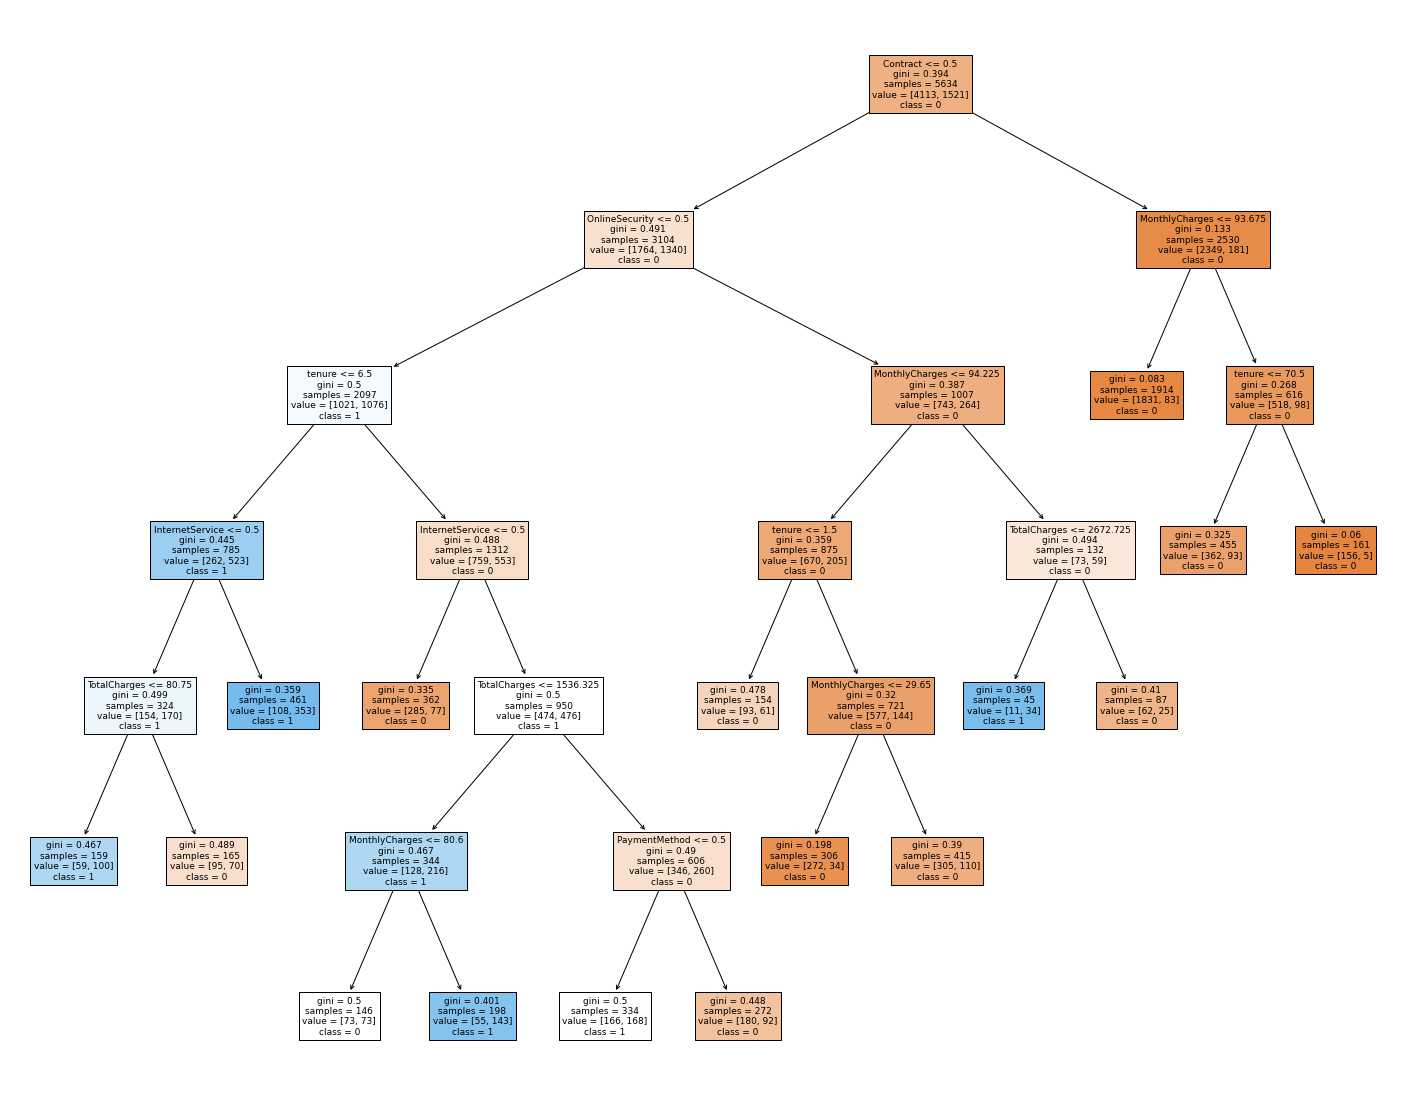

In [ ]:
# Plotagem da árvore do modelo
fig = plt.figure(figsize=(25,20))

# Geração da árvore
_ = tree.plot_tree(melhor_modelo,
               feature_names = X.columns,
               class_names = ['0','1'],
               filled=True)

##Avaliação 

In [ ]:
# ccp_alpha modelos
print(f'ccp_alpha modelos \n\nccp_alpha padrão: {modelo_padrao.ccp_alpha}\nccp_alpha ótimo: {round(melhor_modelo.ccp_alpha,4)}')

ccp_alpha modelos 

ccp_alpha padrão: 0.01
ccp_alpha ótimo: 0.0011


In [ ]:
print(f'Validação Cruzada Score \n\n\
ccp_alpha padrão: {round(cross_val_score(modelo_padrao, X, y, cv=5).mean(),4)}\n\
ccp_alpha ótimo: {round(cross_val_score(melhor_modelo ,X , y, cv=5).mean(),4)}')

Validação Cruzada Score 

ccp_alpha padrão: 0.7595
ccp_alpha ótimo: 0.7951


[[996  65]
 [222 126]]


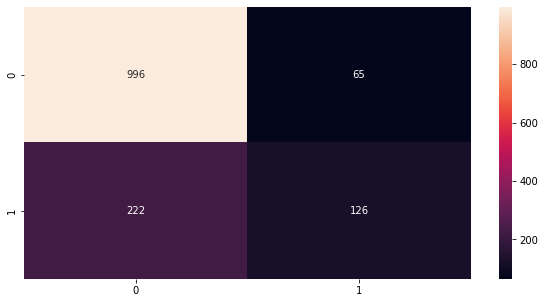

In [ ]:
previsoes_padrao = modelo_padrao.predict(X_test)

matriz_padrao = confusion_matrix(y_test, previsoes_padrao)
print(matriz_padrao)

plt.figure(figsize=(10,5))

sns.heatmap(matriz_padrao, annot = True, fmt='d')

[[937 124]
 [150 198]]


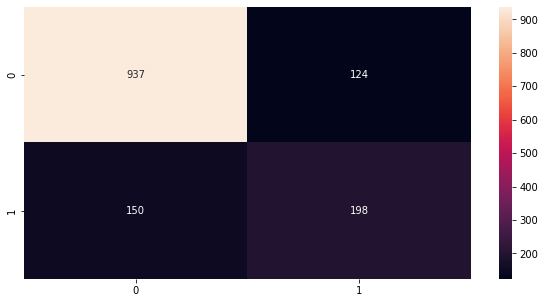

In [ ]:
previsoes_otimo = melhor_modelo.predict(X_test)

matriz_padrao = confusion_matrix(y_test, previsoes_otimo)
print(matriz_padrao)

plt.figure(figsize=(10,5))

sns.heatmap(matriz_padrao, annot = True, fmt='d')

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, previsoes_padrao, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.94      0.87      1061
     class 1       0.66      0.36      0.47       348

    accuracy                           0.80      1409
   macro avg       0.74      0.65      0.67      1409
weighted avg       0.78      0.80      0.77      1409



In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, previsoes_otimo, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.88      0.87      1061
     class 1       0.61      0.57      0.59       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.81      0.80      1409

